In [1]:
# Project(Programming Basics and Data Analytics with Python)
#Arpana Singh

In [2]:
#Importing library
import pandas as pd
import numpy as np

### 1 : Load the data file using pandas. 

In [3]:
#Reading csv file with read_csv

df_proj = pd.read_csv('1569582940_googleplaystore.zip')

In [6]:
df_proj['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
#Making copy of dataset
df_proj1= df_proj.copy(deep=True)

In [9]:
df_proj1.shape

(10841, 13)

In [10]:
#checking columns.
df_proj1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
df_proj1.info()   # understanding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df_proj1.describe() #checking count, mean median, mode std and quantile of int variable. 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# check top 3 columns 
df_proj1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 2: Check for null values in the data. Get the number of null values for each column.

In [10]:
#cheking null values

#Rating feature has 1474 null value
#Type has 1 null value
#Content rating has 1 null value
#Current var has 8 null values
#Android Var 3 null values
df_proj1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##  3: Drop records with nulls in any of the columns. 

In [11]:
#Dropping null values

#Finding---> Before dropping null values total records were (10841, 13)
#Finding---> After dropping null values total records are   (9360 ,13)

df_proj1=df_proj1.dropna()
df_proj1.shape

(9360, 13)

##  4 : Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

### 4:1  Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

        1:1 Extract the numeric value from the column

        1:2 Multiply the value by 1,000, if size is mentioned in Mb

In [12]:
df_proj1.Size = df_proj1.Size.replace('Varies with device','0k')
print(df_proj1.Size.head(20))

df_proj1['Measure'] = df_proj1['Size'].str[-1:]
df_proj1['Size']=df_proj1['Size'].replace({'M':'', 'k':'', 'K':''}, regex=True)

#change datatype
df_proj1['Size']=df_proj1['Size'].astype(float)

df_proj1['Size'] = np.where(df_proj1['Measure'] == 'M',df_proj1['Size'] * 1000,df_proj1['Size'])



0      19M
1      14M
2     8.7M
3      25M
4     2.8M
5     5.6M
6      19M
7      29M
8      33M
9     3.1M
10     28M
11     12M
12     20M
13     21M
14     37M
16    5.5M
17     17M
18     39M
19     31M
20     14M
Name: Size, dtype: object


In [13]:
df_proj1 = df_proj1.drop(['Measure'], axis =1)
print(df_proj1.Size.tail(15))
# Now we have removed the 'M' and 'k' alphabet from the data and multiply those values where 'M' is present

10817     8000.0
10819     3600.0
10820     8600.0
10826        0.0
10827    13000.0
10828    13000.0
10829     7400.0
10830     2300.0
10832      582.0
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size, dtype: float64


## 4: 2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).



In [14]:
df_proj1['Reviews']=df_proj1['Reviews'].astype(int)   #coverting datatype of review to int from string

In [15]:
df_proj1['Reviews'].dtypes

dtype('int64')

In [16]:
df_proj1.shape

(9360, 13)

## 4: 3 Installs field is currently stored as string and has values like 1,000,000+. 

        Treat 1,000,000+ as 1,000,000

        remove ‘+’, ‘,’ from the field, convert it to integer

In [17]:
df_proj1['Installs']=df_proj1['Installs'].str[:-1]

In [18]:
df_proj1['Installs']=df_proj1['Installs'].replace(",","",regex=True).astype(int)
#removing "+" and "," from "Installs" field. 

In [19]:
df_proj1['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [20]:
df_proj1.shape

(9360, 13)

##  4:4 Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [21]:
df_proj1.Price = df_proj1.Price.str.lstrip("$").astype(float) 
#removing "$" sign from "Price" field and converting it int.

In [22]:
df_proj1.Price.dtypes

dtype('float64')

In [23]:
df_proj1['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [24]:
df_proj1.shape

(9360, 13)

# 5: Sanity checks:

## 5:1 Average rating should be between 1 and 5 as only these values are allowed on the play store. 

Drop the rows that have a value outside this range.

In [25]:
df_filtered = df_proj1[df_proj1['Rating'] < 1],df_proj1[df_proj1['Rating'] >5]
df_filtered
#"Rating" field has no value <1 and  >5 it seems, because when I checked the shape before and after it is the same.


(Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
 Index: [],
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
 Index: [])

## 5:2 Reviews should not be more than installs as only those who installed can review the app. 

If there are any such records, drop them.



In [26]:
df_proj1.shape

(9360, 13)

In [27]:
temp = df_proj1.drop(df_proj1[(df_proj1.Reviews) > (df_proj1.Installs)].index, inplace=True, axis=0)
print(temp)
print(df_proj1.shape)
# 7 Review field had value more than Installs, which has been dropped.

None
(9353, 13)


## 5:3For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [28]:
temp1 = df_proj1.drop(df_proj1[(df_proj1.Type=='Free') & (df_proj1.Price>0)].index, inplace=True,axis=0)
print(temp1)
# No Free App is having Price less than 0.

None


## 5: Performing univariate analysis: 

###  - Boxplot for Price

- Are there any outliers? Think about the price of usual apps on Play Store.


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

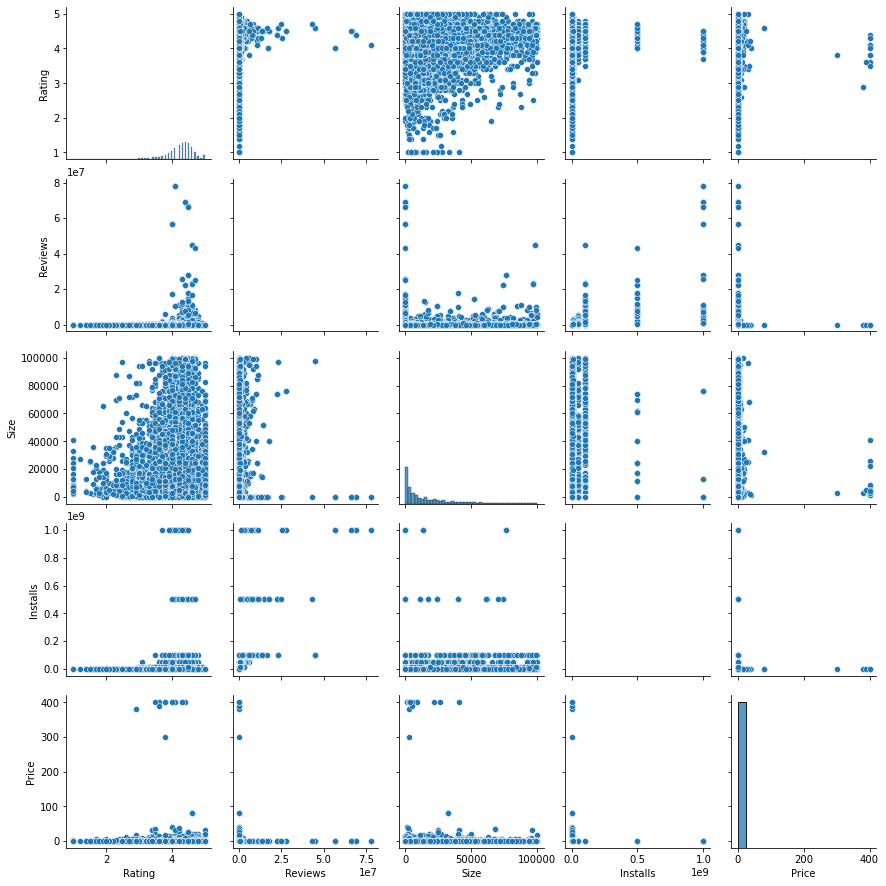

In [30]:
sns.pairplot(df_proj1)
# pairplot shows all possible relationship among all the variables.

{'whiskers': [<matplotlib.lines.Line2D at 0x12a6fdf70>,
 'caps': [<matplotlib.lines.Line2D at 0x12a71cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a6de580>],
 'medians': [<matplotlib.lines.Line2D at 0x12a72b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a74ad00>],
 'means': []}

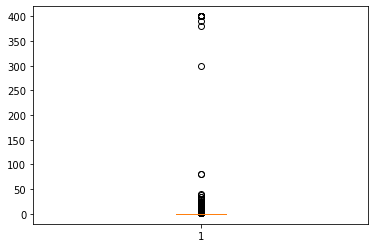

In [31]:
plt.boxplot(df_proj1['Price'])
# boxplot shows that Price field is having outliers.

## Boxplot for Reviews

- Are there any apps with very high number of reviews? Do the values seem right?


{'whiskers': [<matplotlib.lines.Line2D at 0x12c00cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x122d0d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x122a60880>],
 'medians': [<matplotlib.lines.Line2D at 0x122ccfac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c02ec10>],
 'means': []}

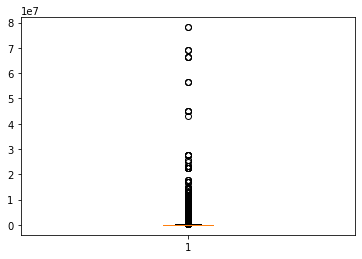

In [32]:
plt.boxplot(df_proj1['Reviews'])
#Reviews field is also having outliers.

## Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?



(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

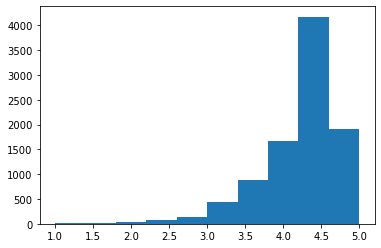

In [33]:
plt.hist(df_proj1.Rating)
# The rating is not noramlly distributed because there is left skew and 
#the rating values is more towards higher ratings.

## Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

 



(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

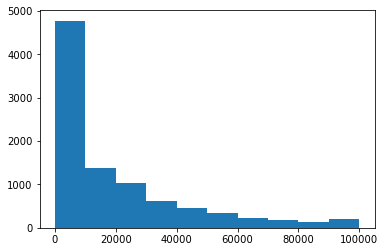

In [34]:
plt.hist(df_proj1.Size)
# Size column is not normally distributed because it is having right skew.

## 6:1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

6:1: Check out the records with very high price

6:1:1 Is 200 indeed a high price?

6:1:2 Drop these as most seem to be junk apps

In [35]:
df_proj1.describe()

,Rating,Reviews,Size,Installs,Price
count,9353.000000,9.353000e+03,9353.000000,9.353000e+03,9353.000000
mean,4.191254,5.147606e+05,18957.610660,1.792215e+07,0.961467
std,0.515010,3.146169e+06,23025.327915,9.129920e+07,15.827539
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,2400.000000,1.000000e+04,0.000000
50%,4.300000,5.967000e+03,9500.000000,5.000000e+05,0.000000
75%,4.500000,8.174700e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [36]:
# Outlier Treatment
Q1=np.percentile(df_proj1['Price'],25)
Q3=np.percentile(df_proj1['Price'],75)
print(Q1)
print(Q3)
IQR = Q3-Q1

0.0
0.0


In [37]:
outlier = df_proj1.Price[(df_proj1['Price'] > Q3+1.5*IQR) | (df_proj1['Price'] < Q1-1.5*IQR)]
print(outlier.unique())

[  4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99   7.49
   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99  29.99
  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95   4.49
   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76   4.84
   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99  18.99
 389.99   8.49   1.75  14.     2.     3.08   2.59  19.4    3.9    4.59
  15.46   3.04  13.99   4.29   3.28   4.6    1.     2.95   2.9    1.97
   2.56   1.2 ]


In [38]:
df_proj1.shape

(9353, 13)

In [39]:
df_proj1[df_proj1.Price>200].shape

(15, 13)

In [40]:
price_outliers = df_proj1[df_proj1.Price>200].index
print(df_proj1.drop(labels=price_outliers, inplace=True))

#I am putting all the values more than $200 from Price col into a different variable (Price_outlier) and dropping it.
#I got 15 records where value is more than $200 in price col.

None


In [41]:
df_proj1.shape
#After dropping the records my new shape is 9338,13.

(9338, 13)

### 6:2 Reviews: Very few apps have very high number of reviews. 
    
These are all star apps that don’t help with the analysis and, in fact, will skew it. 

Drop records having more than 2 million reviews.



In [42]:
print(df_proj1.Reviews.describe())

count    9.338000e+03
mean     5.155865e+05
std      3.148627e+06
min      1.000000e+00
25%      1.880000e+02
50%      6.009000e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64


In [43]:
df_proj1.shape

(9338, 13)

In [44]:
# Outlier Treatment
Q1 = np.percentile(df_proj1.Reviews,25)
Q3 = np.percentile(df_proj1.Reviews,75)
IQR = Q3-Q1
print(IQR)

82283.0


In [45]:
reviews_outliers = df_proj1[(df_proj1.Reviews>Q3+1.5*IQR) | (df_proj1.Reviews<Q1-1.5*IQR)]
print(reviews_outliers.shape)

(1628, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x12ae08d60>,
 'caps': [<matplotlib.lines.Line2D at 0x12ae1a5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12adf8580>],
 'medians': [<matplotlib.lines.Line2D at 0x12ae2a580>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ae3ad60>],
 'means': []}

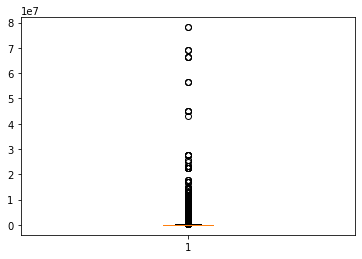

In [46]:
plt.boxplot(df_proj1.Reviews)

In [47]:
# Dropping all those values which are greater than 2 million.
higher_values = df_proj1[df_proj1.Reviews > 2000000].index


In [48]:
df_proj1.drop(labels=higher_values,inplace=True)

In [49]:
df_proj1.shape

(8885, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x12b028d90>,
 'caps': [<matplotlib.lines.Line2D at 0x12b039a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b018550>],
 'medians': [<matplotlib.lines.Line2D at 0x12b049550>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b05ad90>],
 'means': []}

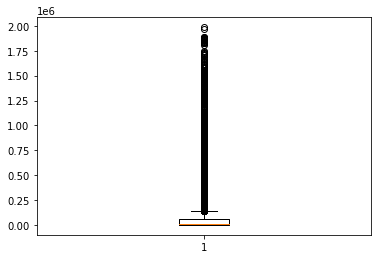

In [50]:
plt.boxplot(df_proj1.Reviews)

## 6:3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

6:3:1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

6:3:2 Decide a threshold as cutoff for outlier and drop records having values more than that

In [51]:
from scipy import stats

In [52]:
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
inst_percentage = np.percentile(df_proj1['Installs'],[10, 25, 50, 70, 90, 95, 99])
print(inst_percentage)

[1.e+03 1.e+04 5.e+05 1.e+06 1.e+07 1.e+07 1.e+08]


In [53]:
higher_values = df_proj1[df_proj1.Installs > 4000000].index
print(df_proj1.drop(higher_values, inplace = True))

#I have decided threshold value 4000000 for installs.
# Dropped records from Installs col which have value more than 4000000.

None


{'whiskers': [<matplotlib.lines.Line2D at 0x12b2377c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12b257fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b237a90>],
 'medians': [<matplotlib.lines.Line2D at 0x12b269a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b2697c0>],
 'means': []}

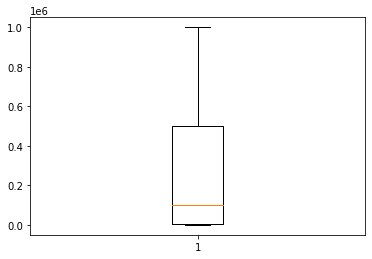

In [54]:
plt.boxplot(df_proj1.Installs)

In [55]:
df_proj1.describe()

,Rating,Reviews,Size,Installs,Price
count,6506.000000,6506.000000,6506.000000,6506.000000,6506.000000
mean,4.139179,9570.197510,17686.647940,306741.901322,0.477678
std,0.582584,22904.190881,20629.452985,413243.643015,2.584501
min,1.000000,1.000000,0.000000,5.000000,0.000000
25%,3.900000,63.000000,3300.000000,5000.000000,0.000000
50%,4.200000,754.000000,9300.000000,100000.000000,0.000000
75%,4.500000,7960.500000,25000.000000,500000.000000,0.000000
max,5.000000,376223.000000,100000.000000,1000000.000000,79.990000


In [56]:
df_proj1.shape

(6506, 13)

## 7: Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### 7:1 Make scatter plot/joinplot for Rating vs. Price

### 7:1:1 What pattern do you observe? Does rating increase with price?

In [57]:
df_proj1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.143262,0.020782,0.083023,0.037068
Reviews,0.143262,1.000000,0.129941,0.586410,-0.035443
Size,0.020782,0.129941,1.000000,0.135565,0.026597
Installs,0.083023,0.586410,0.135565,1.000000,-0.115303
Price,0.037068,-0.035443,0.026597,-0.115303,1.000000


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Rating vs Price')

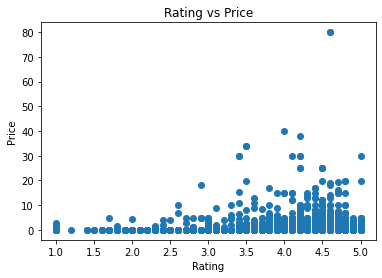

In [59]:
#Analysis of relationship between Rating and Price
plt.scatter(df_proj1['Rating'],df_proj1['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')

## 7:2Make scatter plot/joinplot for Rating vs. Size

### 7:2:1 Are heavier apps rated better?


<AxesSubplot:xlabel='Rating', ylabel='Size'>

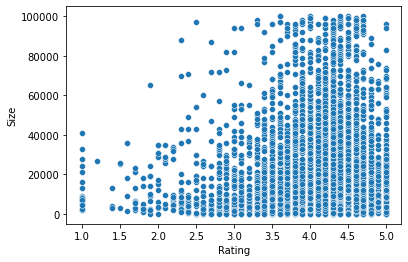

In [60]:
sns.scatterplot(data=df_proj1, x="Rating", y="Size")
#Here I can say that not necessarily heavier app is having better Rating.

## 7:3Make scatter plot/joinplot for Rating vs. Reviews

### 7:3:1 Does more review mean a better rating always?

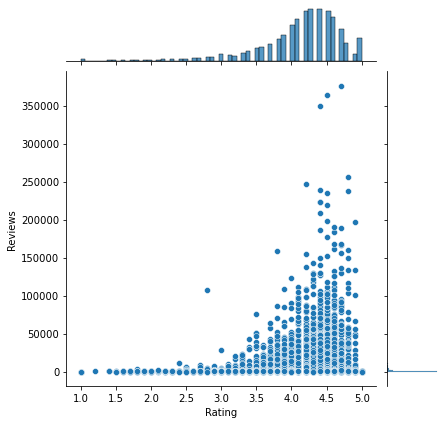

In [61]:
sns.jointplot(data=df_proj1, x="Rating", y="Reviews")
#As we can see below that Rating and Reviews are positively correlated. It shows, more Review means better Rating.

## 7:4 Make boxplot for Rating vs. Content Rating

### 7:4:1 Is there any difference in the ratings? Are some types liked better?


In [62]:
df_proj1.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.137084
Everyone 10+       4.173239
Mature 17+         4.066561
Teen               4.181280
Unrated            4.100000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

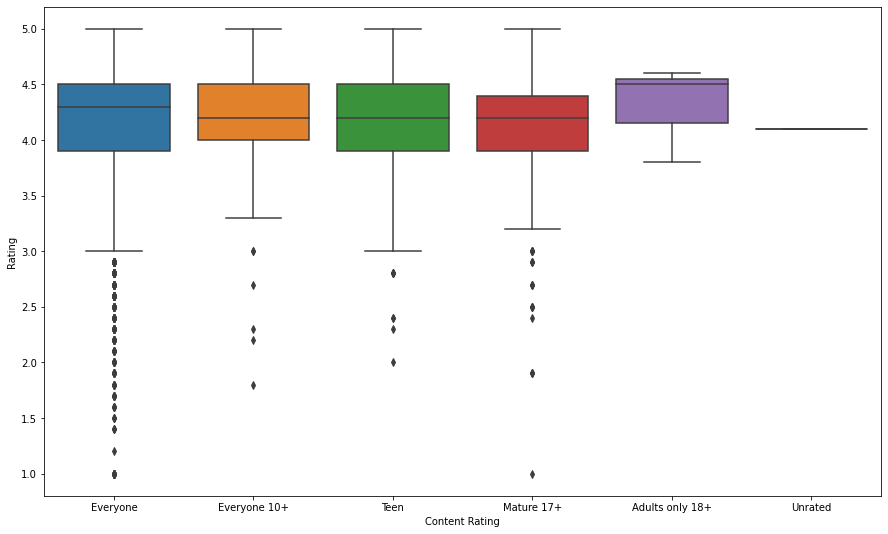

In [63]:
plt.figure(figsize=(15,9))
sns.boxplot(x ='Content Rating', y = 'Rating' , data = df_proj1)
# By seeing below boxplot I can say that Adult only 18+ is having better Rating because it does not having outliers.

## 7:5 Make boxplot for Ratings vs. Category

### 7:5:1 Which genre has the best ratings?


In [64]:
df_proj1.groupby(['Category'])['Rating'].mean()

Category
ART_AND_DESIGN         4.367308
AUTO_AND_VEHICLES      4.176471
BEAUTY                 4.280000
BOOKS_AND_REFERENCE    4.329927
BUSINESS               4.092857
COMICS                 4.150000
COMMUNICATION          4.032298
DATING                 3.940237
EDUCATION              4.344444
ENTERTAINMENT          4.117647
EVENTS                 4.455814
FAMILY                 4.172035
FINANCE                4.104089
FOOD_AND_DRINK         4.121519
GAME                   4.165709
HEALTH_AND_FITNESS     4.195215
HOUSE_AND_HOME         4.130000
LIBRARIES_AND_DEMO     4.200000
LIFESTYLE              4.086792
MAPS_AND_NAVIGATION    3.968889
MEDICAL                4.185260
NEWS_AND_MAGAZINES     4.101714
PARENTING              4.300000
PERSONALIZATION        4.321459
PHOTOGRAPHY            4.028966
PRODUCTIVITY           4.126761
SHOPPING               4.196721
SOCIAL                 4.224088
SPORTS                 4.201010
TOOLS                  3.974312
TRAVEL_AND_LOCAL       4.027206

<AxesSubplot:xlabel='Category'>

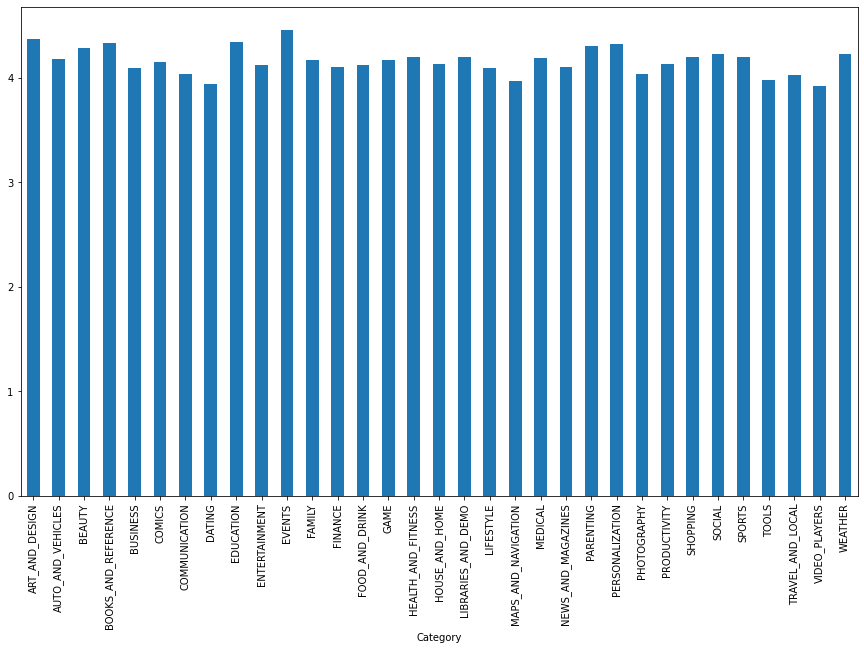

In [65]:
plt.figure(figsize=(15,9))
df_proj1.groupby(['Category'])['Rating'].mean().plot(kind='bar')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

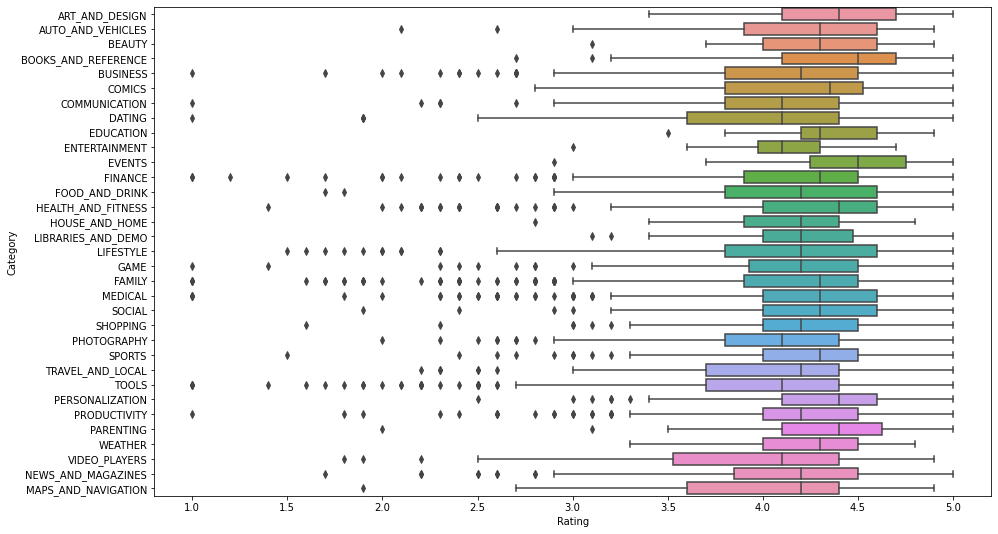

In [66]:
plt.figure(figsize=(15,9))
sns.boxplot(df_proj1['Rating'], df_proj1['Category'])
# Here by seeing boxplot I can say that Event is having best Rating.

## 8 Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

### 8:1 Reviews and Install have some values that are still relatively very high.

Before building a linear regression model, you need to reduce the skew.

Apply log transformation (np.log1p) to Reviews and Installs.

In [67]:
inp1= df_proj1.copy()

In [68]:
inp1.Reviews.describe()

count      6506.000000
mean       9570.197510
std       22904.190881
min           1.000000
25%          63.000000
50%         754.000000
75%        7960.500000
max      376223.000000
Name: Reviews, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

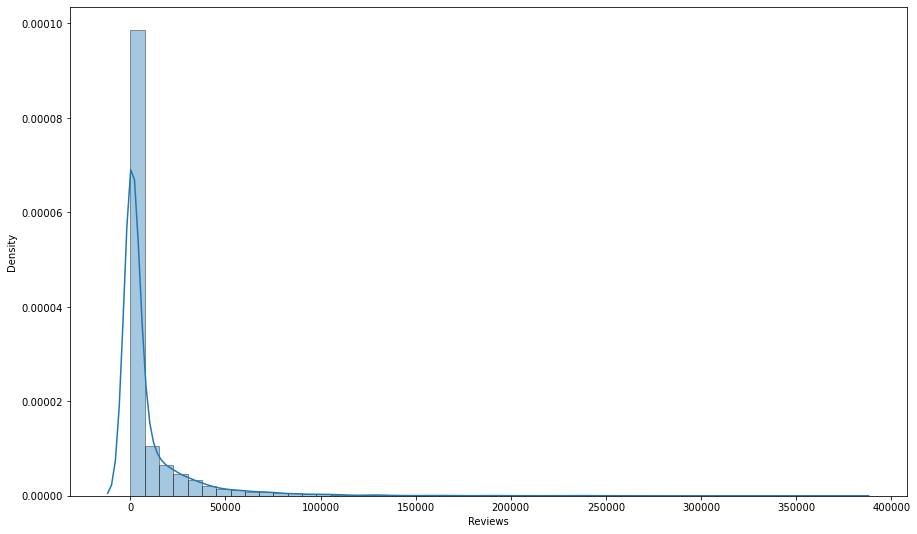

In [69]:
plt.figure(figsize=(15,9))
sns.distplot(inp1.Reviews, hist=True, hist_kws=dict(ec='k')) # skewed dataset

### '''Here we can see that data is not normally distributed because we can see that there is a huge difference in mean and std similarlly there is relatively very heigh difference in min and max '''

In [70]:
inp1.Reviews= inp1.Reviews.apply(np.log1p)
# Applying log function to normalize the data.

In [71]:
inp1.Reviews.describe()

count    6506.000000
mean        6.515563
std         2.886707
min         0.693147
25%         4.158883
50%         6.626714
75%         8.982371
max        12.837940
Name: Reviews, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

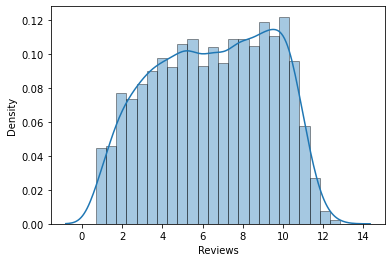

In [72]:
sns.distplot(inp1.Reviews, hist=True, hist_kws=dict(ec='k'))

### Checking Installs column is normally distributed or not

In [73]:
inp1.Installs.describe()

count       6506.000000
mean      306741.901322
std       413243.643015
min            5.000000
25%         5000.000000
50%       100000.000000
75%       500000.000000
max      1000000.000000
Name: Installs, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

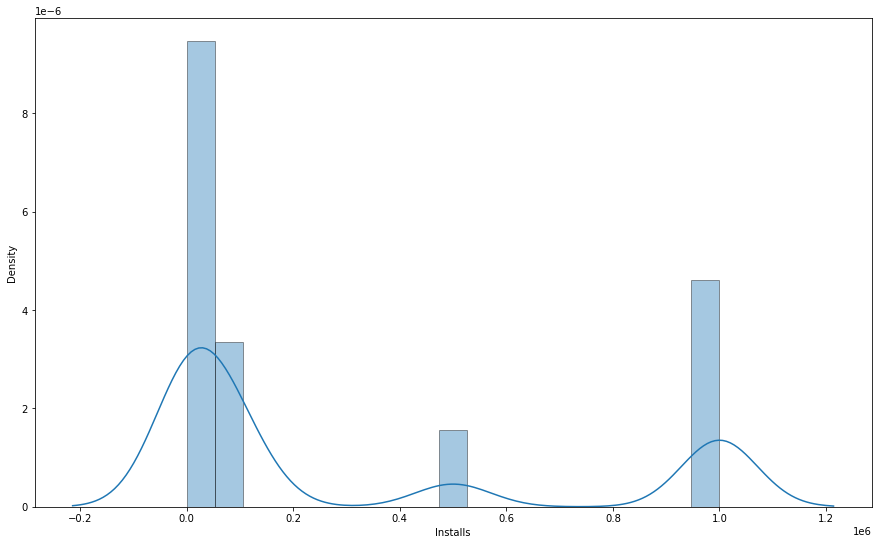

In [74]:
plt.figure(figsize=(15,9))
sns.distplot(inp1.Installs, hist=True, hist_kws=dict(ec='k'))

### '''For Installs also we can see that data is not normally distributed because we can see that there is a huge difference in mean and std similarlly there is relatively very heigh difference in min and max '''

In [75]:
inp1.Installs= inp1.Installs.apply(np.log1p)
# Applying log function to normalize the data.

In [76]:
inp1.Installs.describe()

count    6506.000000
mean       10.439688
std         2.946528
min         1.791759
25%         8.517393
50%        11.512935
75%        13.122365
max        13.815512
Name: Installs, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

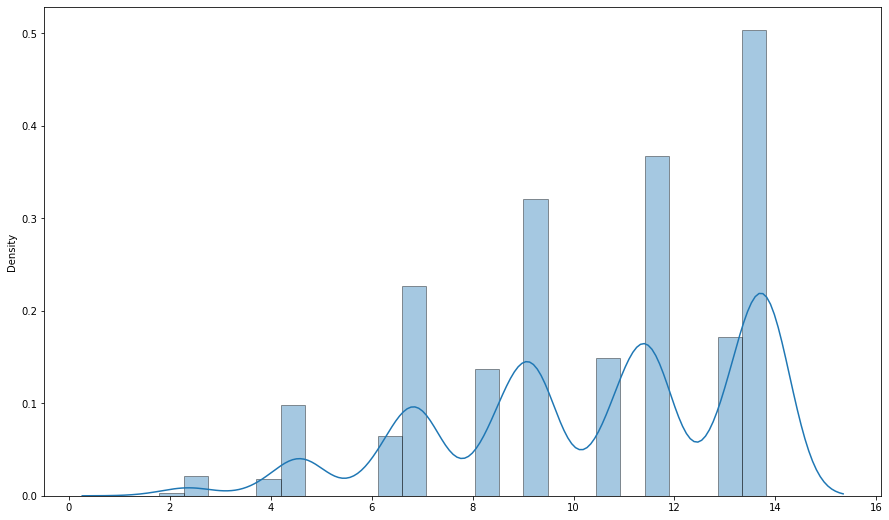

In [77]:
plt.figure(figsize=(15,9))
sns.distplot([inp1.Installs],hist=True, hist_kws=dict(ec='k'))

## 8:2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [78]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [79]:
inp1.shape

(6506, 13)

In [80]:
inp1.drop(['App', 'Last Updated','Current Ver','Android Ver'],axis= 1, inplace=True)
#Dropped App, Last Updated, Current Ver, and Android Ver.

In [81]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

## 8:3 Get dummy columns for Category, Genres, and Content Rating.

This needs to be done as the models do not understand categorical data, and all data should be numeric.

Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


In [82]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 0 to 10839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        6506 non-null   object 
 1   Rating          6506 non-null   float64
 2   Reviews         6506 non-null   float64
 3   Size            6506 non-null   float64
 4   Installs        6506 non-null   float64
 5   Type            6506 non-null   object 
 6   Price           6506 non-null   float64
 7   Content Rating  6506 non-null   object 
 8   Genres          6506 non-null   object 
dtypes: float64(5), object(4)
memory usage: 766.3+ KB


In [83]:
inp2 = pd.get_dummies(inp1,columns=['Category','Genres','Content Rating'])
inp2.head()
#Created dummy column for Category, Genres, and Content Rating, which shows numaric binary values.

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 0 to 10839
Columns: 153 entries, Rating to Content Rating_Unrated
dtypes: float64(5), object(1), uint8(147)
memory usage: 1.5+ MB


## 9: Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
inp1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.118196,0.020782,-0.000285,0.037068
Reviews,0.118196,1.000000,0.169976,0.924108,-0.063712
Size,0.020782,0.169976,1.000000,0.144588,0.026597
Installs,-0.000285,0.924108,0.144588,1.000000,-0.140013
Price,0.037068,-0.063712,0.026597,-0.140013,1.000000


In [87]:
X = inp2[['Price', 'Reviews','Size','Installs']]
y = inp2[['Rating']]
# since it is bivariate analysis where my dependent(target) variable is Rating and Independent variable is Price.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=120)
#Splitting the dataset.. 70 for traing and 30 for testing.

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4554, 4)
(1952, 4)
(4554, 1)
(1952, 1)


In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
#building the model

LinearRegression()

In [91]:
print(lm.coef_)
# coefficient shows stength and direction of relation.

[[-6.66813815e-03  1.68157197e-01 -1.61828114e-07 -1.51694325e-01]]


In [92]:
print(lm.intercept_)

[4.62641562]


In [93]:
prediction = lm.predict(X_test)
print(prediction)

[[4.58648892]
 [4.47464847]
 [3.82537121]
 ...
 [4.31279937]
 [4.02579539]
 [4.28610111]]


In [94]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, prediction)
r_square = r2_score(y_test, prediction)

In [95]:
print(mse)
print(r_square)

0.28789394721521677
0.09181649594033903


### With above model it is clear that there is no correlation or zero correlation between our two variable x and y because our r-square value is very low. so we cann't say that Rating affects app in any way.